## Goal:
Generate nba career predictions data based on our first model's results.
Run this notebook in the `tensorflow` container.

Note: We have issues with imblearn being installed in-line, so please run `pip install imblearn` in a terminal window and restart the kernel.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import scale, LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import joblib as jb
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(12, 8)})

Read in our input data. This data contains NCAA basketball players' biometrics and game play data. This numerical data has been partitioned into bins in order to reinforce patterns to our model. 

In [12]:
data = pd.read_csv('../Data/binned_data.csv')
data.drop_duplicates(subset = ['ncaa_id', 'nba_id'], inplace = True)
data = data.loc[data['currently_in_school'] == 0]
print(data.shape)
data.head()

(18764, 418)


,ncaa_id,nba_id,player_name,currently_in_school,height_bin_1,height_bin_2,height_bin_3,height_bin_4,height_bin_5,weight_bin_1,weight_bin_2,weight_bin_3,weight_bin_4,weight_bin_5,high_school_national_rank_bin_1,high_school_national_rank_bin_2,high_school_recruit_score_bin_2,high_school_recruit_score_bin_3,high_school_recruit_score_bin_4,high_school_recruit_score_bin_5,draft_rank_bin_1,draft_rank_bin_2,draft_rank_bin_3,draft_rank_bin_4,draft_rank_bin_5,age_bin_2,age_bin_3,age_bin_4,age_bin_5,assists_bin_1,assists_bin_2,assists_bin_3,assists_bin_4,blocks_bin_1,blocks_bin_2,blocks_bin_3,blocks_bin_4,blocks_bin_5,defensive_rebounds_bin_1,defensive_rebounds_bin_2,defensive_rebounds_bin_3,defensive_rebounds_bin_4,field_goal_attempts_bin_1,field_goal_attempts_bin_2,field_goal_attempts_bin_3,field_goal_attempts_bin_4,field_goals_bin_1,field_goals_bin_2,field_goals_bin_3,field_goals_bin_4,field_goal_percentage_bin_1,field_goal_percentage_bin_2,field_goal_percentage_bin_3,field_goal_percentage_bin_4,field_goal_percentage_bin_5,free_throw_attempt_rate_bin_1,free_throw_attempt_rate_bin_2,free_throw_attempt_rate_bin_3,free_throw_attempt_rate_bin_4,free_throw_attempt_rate_bin_5,free_throw_attempt_rate_bin_6,free_throw_attempts_bin_1,free_throw_attempts_bin_2,free_throw_attempts_bin_3,free_throw_attempts_bin_4,free_throw_percentage_bin_1,free_throw_percentage_bin_2,free_throw_percentage_bin_3,games_played_bin_1,games_played_bin_2,games_played_bin_3,games_started_bin_1,games_started_bin_2,games_started_bin_3,games_started_bin_4,minutes_played_bin_1,minutes_played_bin_2,minutes_played_bin_3,minutes_played_bin_4,offensive_rebounds_bin_1,offensive_rebounds_bin_2,offensive_rebounds_bin_3,offensive_rebounds_bin_4,personal_fouls_bin_1,personal_fouls_bin_2,personal_fouls_bin_3,personal_fouls_bin_4,points_bin_1,points_bin_2,points_bin_3,points_bin_4,steals_bin_1,steals_bin_2,steals_bin_3,steals_bin_4,three_point_attempt_rate_bin_1,three_point_attempt_rate_bin_2,three_point_attempt_rate_bin_3,three_point_attempts_bin_1,three_point_attempts_bin_2,three_point_attempts_bin_3,three_point_attempts_bin_4,three_point_percentage_bin_1,three_point_percentage_bin_2,three_point_percentage_bin_3,three_point_percentage_bin_4,three_pointers_bin_1,three_pointers_bin_2,three_pointers_bin_3,three_pointers_bin_4,total_rebounds_bin_1,total_rebounds_bin_2,total_rebounds_bin_3,total_rebounds_bin_4,turnovers_bin_1,turnovers_bin_2,turnovers_bin_3,turnovers_bin_4,two_point_attempts_bin_1,two_point_attempts_bin_2,two_point_attempts_bin_3,two_point_attempts_bin_4,two_point_percentage_bin_1,two_point_percentage_bin_2,two_point_percentage_bin_3,two_point_percentage_bin_4,two_pointers_bin_1,two_pointers_bin_2,two_pointers_bin_3,two_pointers_bin_4,seasons_played_bin_2,seasons_played_bin_3,seasons_played_bin_4,assist_percentage_bin_1,assist_percentage_bin_2,assist_percentage_bin_3,assist_percentage_bin_4,assist_percentage_bin_5,turnover_percentage_bin_1,turnover_percentage_bin_2,turnover_percentage_bin_3,turnover_percentage_bin_4,turnover_percentage_bin_5,usage_percentage_bin_1,usage_percentage_bin_2,usage_percentage_bin_3,usage_percentage_bin_4,usage_percentage_bin_5,usage_percentage_bin_6,defensive_win_shares_bin_1,defensive_win_shares_bin_2,defensive_win_shares_bin_3,defensive_win_shares_bin_4,offensive_win_shares_bin_1,offensive_win_shares_bin_2,offensive_win_shares_bin_3,height_to_weight_bin_1,height_to_weight_bin_2,height_to_weight_bin_3,height_to_weight_bin_5,weight_to_height_bin_1,weight_to_height_bin_2,weight_to_height_bin_3,weight_to_height_bin_4,weight_to_height_bin_5,recruit_draft_rank_mean_bin_1,recruit_draft_rank_mean_bin_2,draft_recruit_ratio_bin_1,draft_recruit_ratio_bin_2,draft_recruit_ratio_bin_3,draft_recruit_ratio_bin_4,draft_recruit_ratio_bin_5,assist_to_turnover_ratio_bin_1,assist_to_turnover_ratio_bin_2,assist_to_turnover_ratio_bin_3,assist_to_turnover_ratio_bin_4,assist_to_turnover_ratio_bin_5,assist_to_turnover_ratio_bin_6,assists_per_minute_bin_1,assists_pe

In [8]:
data.loc[data.duplicated(subset = 'ncaa_id', keep = False)]

,ncaa_id,nba_id,player_name,currently_in_school,height_bin_1,height_bin_2,height_bin_3,height_bin_4,height_bin_5,weight_bin_1,weight_bin_2,weight_bin_3,weight_bin_4,weight_bin_5,high_school_national_rank_bin_1,high_school_national_rank_bin_2,high_school_recruit_score_bin_2,high_school_recruit_score_bin_3,high_school_recruit_score_bin_4,high_school_recruit_score_bin_5,draft_rank_bin_1,draft_rank_bin_2,draft_rank_bin_3,draft_rank_bin_4,draft_rank_bin_5,age_bin_2,age_bin_3,age_bin_4,age_bin_5,assists_bin_1,assists_bin_2,assists_bin_3,assists_bin_4,blocks_bin_1,blocks_bin_2,blocks_bin_3,blocks_bin_4,blocks_bin_5,defensive_rebounds_bin_1,defensive_rebounds_bin_2,defensive_rebounds_bin_3,defensive_rebounds_bin_4,field_goal_attempts_bin_1,field_goal_attempts_bin_2,field_goal_attempts_bin_3,field_goal_attempts_bin_4,field_goals_bin_1,field_goals_bin_2,field_goals_bin_3,field_goals_bin_4,field_goal_percentage_bin_1,field_goal_percentage_bin_2,field_goal_percentage_bin_3,field_goal_percentage_bin_4,field_goal_percentage_bin_5,free_throw_attempt_rate_bin_1,free_throw_attempt_rate_bin_2,free_throw_attempt_rate_bin_3,free_throw_attempt_rate_bin_4,free_throw_attempt_rate_bin_5,free_throw_attempt_rate_bin_6,free_throw_attempts_bin_1,free_throw_attempts_bin_2,free_throw_attempts_bin_3,free_throw_attempts_bin_4,free_throw_percentage_bin_1,free_throw_percentage_bin_2,free_throw_percentage_bin_3,games_played_bin_1,games_played_bin_2,games_played_bin_3,games_started_bin_1,games_started_bin_2,games_started_bin_3,games_started_bin_4,minutes_played_bin_1,minutes_played_bin_2,minutes_played_bin_3,minutes_played_bin_4,offensive_rebounds_bin_1,offensive_rebounds_bin_2,offensive_rebounds_bin_3,offensive_rebounds_bin_4,personal_fouls_bin_1,personal_fouls_bin_2,personal_fouls_bin_3,personal_fouls_bin_4,points_bin_1,points_bin_2,points_bin_3,points_bin_4,steals_bin_1,steals_bin_2,steals_bin_3,steals_bin_4,three_point_attempt_rate_bin_1,three_point_attempt_rate_bin_2,three_point_attempt_rate_bin_3,three_point_attempts_bin_1,three_point_attempts_bin_2,three_point_attempts_bin_3,three_point_attempts_bin_4,three_point_percentage_bin_1,three_point_percentage_bin_2,three_point_percentage_bin_3,three_point_percentage_bin_4,three_pointers_bin_1,three_pointers_bin_2,three_pointers_bin_3,three_pointers_bin_4,total_rebounds_bin_1,total_rebounds_bin_2,total_rebounds_bin_3,total_rebounds_bin_4,turnovers_bin_1,turnovers_bin_2,turnovers_bin_3,turnovers_bin_4,two_point_attempts_bin_1,two_point_attempts_bin_2,two_point_attempts_bin_3,two_point_attempts_bin_4,two_point_percentage_bin_1,two_point_percentage_bin_2,two_point_percentage_bin_3,two_point_percentage_bin_4,two_pointers_bin_1,two_pointers_bin_2,two_pointers_bin_3,two_pointers_bin_4,seasons_played_bin_2,seasons_played_bin_3,seasons_played_bin_4,assist_percentage_bin_1,assist_percentage_bin_2,assist_percentage_bin_3,assist_percentage_bin_4,assist_percentage_bin_5,turnover_percentage_bin_1,turnover_percentage_bin_2,turnover_percentage_bin_3,turnover_percentage_bin_4,turnover_percentage_bin_5,usage_percentage_bin_1,usage_percentage_bin_2,usage_percentage_bin_3,usage_percentage_bin_4,usage_percentage_bin_5,usage_percentage_bin_6,defensive_win_shares_bin_1,defensive_win_shares_bin_2,defensive_win_shares_bin_3,defensive_win_shares_bin_4,offensive_win_shares_bin_1,offensive_win_shares_bin_2,offensive_win_shares_bin_3,height_to_weight_bin_1,height_to_weight_bin_2,height_to_weight_bin_3,height_to_weight_bin_5,weight_to_height_bin_1,weight_to_height_bin_2,weight_to_height_bin_3,weight_to_height_bin_4,weight_to_height_bin_5,recruit_draft_rank_mean_bin_1,recruit_draft_rank_mean_bin_2,draft_recruit_ratio_bin_1,draft_recruit_ratio_bin_2,draft_recruit_ratio_bin_3,draft_recruit_ratio_bin_4,draft_recruit_ratio_bin_5,assist_to_turnover_ratio_bin_1,assist_to_turnover_ratio_bin_2,assist_to_turnover_ratio_bin_3,assist_to_turnover_ratio_bin_4,assist_to_turnover_ratio_bin_5,assist_to_turnover_ratio_bin_6,assists_per_minute_bin_1,assists_pe

Load up the first model and the features to input.

In [3]:
kb = jb.load('../Data/nba_model_kbest.pkl')
model = jb.load('../Data/nba_model.pkl')

In [4]:
nba_features = data.columns.values[kb.get_support(True)]
nba_features

array(['high_school_national_rank_bin_2',
       'high_school_recruit_score_bin_2',
       'high_school_recruit_score_bin_3', 'draft_rank_bin_1',
       'def_ws_per_minute_bin_4', 'win_shares_per_minute_bin_4', 'height',
       'assist_percentage', 'defensive_win_shares', 'win_share_diff_off'],
      dtype=object)

Store the first model predictions in the `nba_pred` column

In [5]:
data['nba_pred'] = [x[0] for x in model.predict_proba(data[nba_features])]

We would expect the NBA draft probabilities to have this distribution as most NCAA players are not at the caliber needed to be drafted into the NBA.

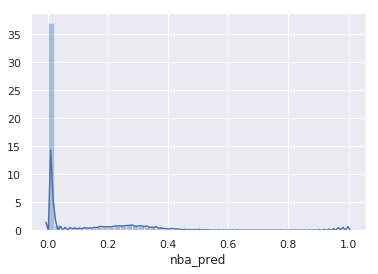

In [6]:
sns.distplot(data.nba_pred);

Drop the `made_nba` column as this contains actual data of who actually got drafted into the NBA. Instead our second model will rely on `nba_pred` which contains our first model's output. 

In [7]:
features = data.drop('made_nba',
                     axis = 1).select_dtypes('int', 'float').columns.to_list()

Read in the `nba_data` csv file in order to scrape the `role` column which contains the actual NBA player's career outlook based on our clustering.

In [15]:
nba_data = pd.read_csv('../Data/nba_data.csv')
nba_data.head()

,ncaa_id,nba_id,player_name,currently_in_school,height_bin_1,height_bin_2,height_bin_3,height_bin_4,height_bin_5,weight_bin_1,weight_bin_2,weight_bin_3,weight_bin_4,weight_bin_5,high_school_national_rank_bin_1,high_school_national_rank_bin_2,high_school_recruit_score_bin_2,high_school_recruit_score_bin_3,high_school_recruit_score_bin_4,high_school_recruit_score_bin_5,draft_rank_bin_1,draft_rank_bin_2,draft_rank_bin_3,draft_rank_bin_4,draft_rank_bin_5,age_bin_2,age_bin_3,age_bin_4,age_bin_5,assists_bin_1,assists_bin_2,assists_bin_3,assists_bin_4,blocks_bin_1,blocks_bin_2,blocks_bin_3,blocks_bin_4,blocks_bin_5,defensive_rebounds_bin_1,defensive_rebounds_bin_2,defensive_rebounds_bin_3,defensive_rebounds_bin_4,field_goal_attempts_bin_1,field_goal_attempts_bin_2,field_goal_attempts_bin_3,field_goal_attempts_bin_4,field_goals_bin_1,field_goals_bin_2,field_goals_bin_3,field_goals_bin_4,field_goal_percentage_bin_1,field_goal_percentage_bin_2,field_goal_percentage_bin_3,field_goal_percentage_bin_4,field_goal_percentage_bin_5,free_throw_attempt_rate_bin_1,free_throw_attempt_rate_bin_2,free_throw_attempt_rate_bin_3,free_throw_attempt_rate_bin_4,free_throw_attempt_rate_bin_5,free_throw_attempt_rate_bin_6,free_throw_attempts_bin_1,free_throw_attempts_bin_2,free_throw_attempts_bin_3,free_throw_attempts_bin_4,free_throw_percentage_bin_1,free_throw_percentage_bin_2,free_throw_percentage_bin_3,games_played_bin_1,games_played_bin_2,games_played_bin_3,games_started_bin_1,games_started_bin_2,games_started_bin_3,games_started_bin_4,minutes_played_bin_1,minutes_played_bin_2,minutes_played_bin_3,minutes_played_bin_4,offensive_rebounds_bin_1,offensive_rebounds_bin_2,offensive_rebounds_bin_3,offensive_rebounds_bin_4,personal_fouls_bin_1,personal_fouls_bin_2,personal_fouls_bin_3,personal_fouls_bin_4,points_bin_1,points_bin_2,points_bin_3,points_bin_4,steals_bin_1,steals_bin_2,steals_bin_3,steals_bin_4,three_point_attempt_rate_bin_1,three_point_attempt_rate_bin_2,three_point_attempt_rate_bin_3,three_point_attempts_bin_1,three_point_attempts_bin_2,three_point_attempts_bin_3,three_point_attempts_bin_4,three_point_percentage_bin_1,three_point_percentage_bin_2,three_point_percentage_bin_3,three_point_percentage_bin_4,three_pointers_bin_1,three_pointers_bin_2,three_pointers_bin_3,three_pointers_bin_4,total_rebounds_bin_1,total_rebounds_bin_2,total_rebounds_bin_3,total_rebounds_bin_4,turnovers_bin_1,turnovers_bin_2,turnovers_bin_3,turnovers_bin_4,two_point_attempts_bin_1,two_point_attempts_bin_2,two_point_attempts_bin_3,two_point_attempts_bin_4,two_point_percentage_bin_1,two_point_percentage_bin_2,two_point_percentage_bin_3,two_point_percentage_bin_4,two_pointers_bin_1,two_pointers_bin_2,two_pointers_bin_3,two_pointers_bin_4,seasons_played_bin_2,seasons_played_bin_3,seasons_played_bin_4,assist_percentage_bin_1,assist_percentage_bin_2,assist_percentage_bin_3,assist_percentage_bin_4,assist_percentage_bin_5,turnover_percentage_bin_1,turnover_percentage_bin_2,turnover_percentage_bin_3,turnover_percentage_bin_4,turnover_percentage_bin_5,usage_percentage_bin_1,usage_percentage_bin_2,usage_percentage_bin_3,usage_percentage_bin_4,usage_percentage_bin_5,usage_percentage_bin_6,defensive_win_shares_bin_1,defensive_win_shares_bin_2,defensive_win_shares_bin_3,defensive_win_shares_bin_4,offensive_win_shares_bin_1,offensive_win_shares_bin_2,offensive_win_shares_bin_3,height_to_weight_bin_1,height_to_weight_bin_2,height_to_weight_bin_3,height_to_weight_bin_5,weight_to_height_bin_1,weight_to_height_bin_2,weight_to_height_bin_3,weight_to_height_bin_4,weight_to_height_bin_5,recruit_draft_rank_mean_bin_1,recruit_draft_rank_mean_bin_2,draft_recruit_ratio_bin_1,draft_recruit_ratio_bin_2,draft_recruit_ratio_bin_3,draft_recruit_ratio_bin_4,draft_recruit_ratio_bin_5,assist_to_turnover_ratio_bin_1,assist_to_turnover_ratio_bin_2,assist_to_turnover_ratio_bin_3,assist_to_turnover_ratio_bin_4,assist_to_turnover_ratio_bin_5,assist_to_turnover_ratio_bin_6,assists_per_minute_bin_1,assists_pe

Merge the NBA roles/career outlook with our college basketball data to form a complete picture of players from NCAA to NBA

In [17]:
data = data.merge(nba_data.loc[nba_data.nba_id.notnull()][['nba_id', 'role']],
                  on = 'nba_id',
                  how = 'left')

In [22]:
data = data.sort_values(by = 'high_school_national_rank').drop_duplicates(subset = 'ncaa_id').reset_index(drop = True)

Set a probability threshold on players we deem would make it to the NBA

In [10]:
mask = (data.nba_pred >= 0.25).values

Those who do not have an NBA role in the `role` column means they did not make it to the NBA

In [11]:
data.role.fillna('Non-NBA', inplace = True)

Transform the roles into numeric labels for model processing

In [12]:
data['role_numeric'] = np.argmax(LabelBinarizer().fit_transform(data.role), axis = 1)

In [13]:
roles_dict = {}
for i in data.sort_values(by = 'role_numeric').role_numeric.unique():
    r = data.loc[data.role_numeric == i].role.unique()[0]
    rd = {i : r}
    roles_dict.update(rd)

Here are the different numerical labels corresponding to our NBA career success levels

In [14]:
roles_dict

{0: 'Benchwarmer',
 1: 'Non-NBA',
 2: 'Replacement Player',
 3: 'Reserve',
 4: 'Role Player',
 5: 'Star',
 6: 'Starter'}

In our input data, the number of non-nba players far exceeds all NBA players in the dataset combined. In terms of NBA career representation, we have the most data for starters, followed by role players. 

[(0, 1000)]

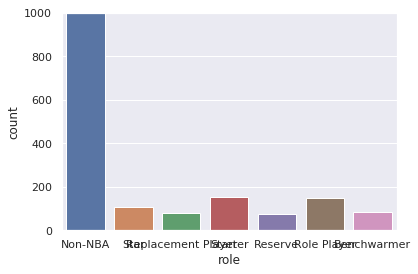

In [15]:
bar = sns.countplot(x = 'role', data = data)
sns.set(rc = {'figure.figsize':(12, 10)})
bar.set(ylim=(0,1000))

In [16]:
data['role'].value_counts()

Non-NBA               18153
Starter                 152
Role Player             148
Star                    108
Benchwarmer              86
Replacement Player       79
Reserve                  73
Name: role, dtype: int64

In [21]:
features

['currently_in_school',
 'height_bin_1',
 'height_bin_2',
 'height_bin_3',
 'height_bin_4',
 'height_bin_5',
 'weight_bin_1',
 'weight_bin_2',
 'weight_bin_3',
 'weight_bin_4',
 'weight_bin_5',
 'high_school_national_rank_bin_1',
 'high_school_national_rank_bin_2',
 'high_school_recruit_score_bin_2',
 'high_school_recruit_score_bin_3',
 'high_school_recruit_score_bin_4',
 'high_school_recruit_score_bin_5',
 'draft_rank_bin_1',
 'draft_rank_bin_2',
 'draft_rank_bin_3',
 'draft_rank_bin_4',
 'draft_rank_bin_5',
 'age_bin_2',
 'age_bin_3',
 'age_bin_4',
 'age_bin_5',
 'assists_bin_1',
 'assists_bin_2',
 'assists_bin_3',
 'assists_bin_4',
 'blocks_bin_1',
 'blocks_bin_2',
 'blocks_bin_3',
 'blocks_bin_4',
 'blocks_bin_5',
 'defensive_rebounds_bin_1',
 'defensive_rebounds_bin_2',
 'defensive_rebounds_bin_3',
 'defensive_rebounds_bin_4',
 'field_goal_attempts_bin_1',
 'field_goal_attempts_bin_2',
 'field_goal_attempts_bin_3',
 'field_goal_attempts_bin_4',
 'field_goals_bin_1',
 'field_goals_

In [22]:
jb.dump(features, '../Models/second_model_inputs.pkl')

['second_model_inputs.pkl']

Our input data encompasses all of our binned features while our target variable is the NBA career success label 

In [17]:
x = np.array(data.loc[mask][features])
y = np.array(data.loc[mask].role_numeric)

This model defines a neural network that is constructed from 8 dense layers. Dense layers were chosen since we opted to utilize a non-linear activation function. Our data is not linearly separable based on our initial clustering we performed on our data in order to generate the target variable (the NBA `role` column). We iterated on the number of layers by adding more layers until the performance of the model leveled out. 

The rectified linear unit (ReLU) activation function was chosen as it was the most computationally efficient available to us. It combines the linear behavior of a linear activation function but still yields a function when derived as opposed to a constant. By having a derivative function, our model can retain the ability to perform backpropagation which allows it to optimize the weights in each neuron.

Since Tensorflow had no native gridsearch, we arrived at our model configuration using manual adjustments. We found that adding subsequent layers that operated on more condensed inputs resulted in optimal accuracy and convergence speed. 

In [18]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(data.role.nunique(), input_dim = len(features), activation = 'relu'),
        tf.keras.layers.Dense(2000, activation = 'relu'),
        tf.keras.layers.Dense(1028, activation = 'relu'),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(72, activation = 'relu'),
        tf.keras.layers.Dense(data.role.nunique(), activation = 'softmax')
    ]
)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 2408      
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              16000     
_________________________________________________________________
dense_2 (Dense)              (None, 1028)              2057028   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               526848    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dens

We iterated through several optimizer functions that would allow us to generate the best performing model. Categorical cross entropy was chosen since our model is a multi-class classification model. We are attempting to predict which class each NBA player will fit into with regards to their career outlook. Lastly, in our metrics, we wanted to capture categorical accuracy. This accuracy measures how accurate our predicted labels match the true labels. 

In [19]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['categorical_accuracy'])

More than 90% of the players we look at will be labeled with Non-NBA. We want to oversample the NBA players (<10% of our dataset) to ensure that our model is able to learn patterns from the NBA players as well. 

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

sm = SMOTE(random_state = 13, sampling_strategy='not majority')
x_rs, y_rs = sm.fit_resample(x, y)

y_train_one_hot = tf.keras.utils.to_categorical(y_rs, num_classes = data.role.nunique())
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes = data.role.nunique())

We specified batch size to be 2000 to ensure that we got enough passes through observations in our dataset to train our model. Increasing the batch size did not improve accuracy after our setpoint. We also settled on 125 to be the number of epochs as this was the number where we saw our categorical accuracy level off. 

In [21]:
model.fit(x_rs,
          y_train_one_hot,
          epochs = 125,
          batch_size = 2000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/125
15428/15428 [==============================] - 5s 303us/sample - loss: 1.9337 - categorical_accuracy: 0.1814
Epoch 2/125
15428/15428 [==============================] - 4s 247us/sample - loss: 1.7152 - categorical_accuracy: 0.3273
Epoch 3/125
15428/15428 [==============================] - 4s 252us/sample - loss: 1.5376 - categorical_accuracy: 0.3880
Epoch 4/125
15428/15428 [==============================] - 4s 266us/sample - loss: 1.4760 - categorical_accuracy: 0.4071
Epoch 5/125
15428/15428 [==============================] - 4s 259us/sample - loss: 1.3702 - categorical_accuracy: 0.4555
Epoch 6/125
15428/15428 [==============================] - 4s 254us/sample - loss: 1.2812 - categorical_accuracy: 0.4893
Epoch 7/125
15428/15428 [==============================] - 4s 284us/sample - loss: 1.2324 - categorical_accuracy: 0.5041
Epoch 8/125
15428/15428 [==============================] - 4s 266us/sample - loss: 1.1703 - categorical_a

Overall model metrics

In [22]:
score = model.evaluate(x_test,
                       y_test_one_hot)

print(model.metrics_names)
print(score)

1301/1301 [==============================] - 0s 165us/sample - loss: 0.0738 - categorical_accuracy: 0.9769
['loss', 'categorical_accuracy']
[0.07381279472908439, 0.9769408]


Pick the most probable label based on the multi-classification and assign that label to the `predicted_role_numeric` column.

In [24]:
data['predicted_role_numeric'] = np.argmax(model.predict(np.array(data[features])), axis = 1)

Transform our numerical predictions into strings based on the `roles_dict` defined above.

In [25]:
data['predicted_role'] = [roles_dict[x] for x in [np.argmax(x) for x in model.predict_proba(np.array(data[features]))]]

In [26]:
for i in roles_dict:
    rate = (data.loc[data.role == roles_dict[i]]['role'] == data.loc[data.role == roles_dict[i]]['predicted_role']).mean()
    print('{} accuracy rate: {}'.format(roles_dict[i], rate))

Benchwarmer accuracy rate: 0.37209302325581395
Non-NBA accuracy rate: 0.9838043298628326
Replacement Player accuracy rate: 0.4810126582278481
Reserve accuracy rate: 0.3561643835616438
Role Player accuracy rate: 0.6891891891891891
Star accuracy rate: 0.8240740740740741
Starter accuracy rate: 0.7828947368421053


Overall career outlook prediction accuracy

In [27]:
(data.role == data.predicted_role).mean()

0.971594233735837

Looking at our predictions for some players that we know about

In [28]:
data.loc[data.player_name.isin(['Zion Williamson', 'Ja Morant', 'Michael Porter'])][['player_name', 'role', 'predicted_role']]

,player_name,role,predicted_role
13166,Michael Porter,Non-NBA,Non-NBA
13167,Michael Porter,Non-NBA,Non-NBA
13168,Michael Porter,Star,Star
16877,Ja Morant,Star,Starter
18790,Zion Williamson,Star,Star


Our success rate in correctly predicting an NBA player's career for players who were actually drafted into the NBA

In [29]:
(data.loc[data.made_nba == 1].role_numeric == data.loc[data.made_nba == 1].predicted_role_numeric).mean()

0.6100719424460431

Let's write these results into a database

In [30]:
insert_data = data[['ncaa_id', 'nba_id', 'player_name', 'nba_pred', 'made_nba', 'predicted_role', 'role']]
insert_data.head()

,ncaa_id,nba_id,player_name,nba_pred,made_nba,predicted_role,role
0,aakim-saintil-1,NaN,Aakim Saintil,0.005339,0,Non-NBA,Non-NBA
1,aakim-saintill-1,NaN,Aakim Saintil,0.234745,0,Non-NBA,Non-NBA
2,aalim-moor-1,NaN,Aalim Moor,0.225700,0,Non-NBA,Non-NBA
3,aamahd-walker-1,NaN,Aamahd Walker,0.006323,0,Non-NBA,Non-NBA
4,aaren-edmead-1,NaN,Aaren Edmead,0.008749,0,Non-NBA,Non-NBA


In [31]:
model.save('../Models/nba_career_outlook_model.h5')

In [32]:
insert_data.to_csv('../Data/hurdle_model_predictions.csv', index = False)

At this point, you want to switch back to the `core` container which allows access to the psycopg module to be installed in order to write the data into the postgres database

Import libraries we need to insert data

In [5]:
import getpass
import pandas as pd
import psycopg2

Login credentials

In [3]:
mypasswd = getpass.getpass()
conn = psycopg2.connect(database = 'cs20_group4',
                              user = 'fhfrf', #replace with pawprint
                              host = 'pgsql.dsa.lan',
                              password = mypasswd)
cursor = conn.cursor()

········


Read in our predictions data from CSV (we needed to dump it to switch containers)

In [6]:
insert_data = pd.read_csv('../Data/hurdle_model_predictions.csv')
insert_data.head()

,ncaa_id,nba_id,player_name,nba_pred,made_nba,predicted_role,role
0,aakim-saintil-1,NaN,Aakim Saintil,0.005339,0,Non-NBA,Non-NBA
1,aakim-saintill-1,NaN,Aakim Saintil,0.234745,0,Non-NBA,Non-NBA
2,aalim-moor-1,NaN,Aalim Moor,0.225700,0,Non-NBA,Non-NBA
3,aamahd-walker-1,NaN,Aamahd Walker,0.006323,0,Non-NBA,Non-NBA
4,aaren-edmead-1,NaN,Aaren Edmead,0.008749,0,Non-NBA,Non-NBA


Define the table schema

In [7]:
cursor = conn.cursor()
c_table = []
for c in insert_data.columns.tolist():
    if insert_data[c].dtype in [float, int, 'int64']:
        c_table.append('{} numeric'.format(c))
    elif insert_data[c].dtype == 'datetime64[ns]':
        c_table.append('{} TIMESTAMP'.format(c))
    else:
        c_table.append('{} varchar({})'.format(c, max([len(str(x)) for x in insert_data[c] if x is not None])))
create_table = 'DROP TABLE IF EXISTS player_predictions; '
create_table += 'CREATE TABLE player_predictions ({})'.format(', '.join(c for c in c_table))
cursor.execute(create_table)
conn.commit()

Insert our predictions data into a table so we can reference it in our Shiny App

In [9]:
df = insert_data.where(pd.notnull(insert_data), None)
cursor = conn.cursor()
INSERT_SQL = 'INSERT INTO player_predictions'
INSERT_SQL += '({}) VALUES'.format(', '.join([x for x in df.columns]))
INSERT_SQL += '({})'.format(''.join(['%s,' * len(df.columns)])[:-1])
with conn, conn.cursor() as cursor:
    for row in df.itertuples(index=False, name=None):
        cursor.execute(INSERT_SQL, row)